In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,BatchNormalization
import cv2
import os
os.chdir('C:/Softwares/Jupyter/Traffic_signal_recognition')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image


In [4]:
data=[]
label=[]
#there are 43 types of signs
classes=43 
cur_path=os.getcwd()

In [5]:
cur_path


'C:\\Softwares\\Jupyter\\Traffic_signal_recognition'

In [6]:


for i in range(classes):
    path = cur_path + '\\Train\\' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '\\' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((30, 30))
            data.append(np.array(resize_image))
            label.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
data = np.array(data)
label = np.array(label)

print(data.shape, label.shape)

(39209, 30, 30, 3) (39209,)


In [7]:
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.2,random_state=0)
#x_train=x_train/255
#x_test=x_test/255
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [9]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(x_train.shape[1:])))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

C:\Softwares\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 20
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - accuracy: 0.6246 - loss: 1.5474 - val_accuracy: 0.9820 - val_loss: 0.0607
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9574 - loss: 0.1381 - val_accuracy: 0.9857 - val_loss: 0.0446
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9747 - loss: 0.0820 - val_accuracy: 0.9904 - val_loss: 0.0362
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9761 - loss: 0.0827 - val_accuracy: 0.9906 - val_loss: 0.0359
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9830 - loss: 0.0578 - val_accuracy: 0.9920 - val_loss: 0.0338
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9816 - loss: 0.0619 - val_accuracy: 0.9848 - val_loss: 0.0596
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9829 - loss: 0.0569 - val_accuracy: 0.9920 - val_loss: 0.0314
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9875 - loss: 0.0450 - 

In [12]:
model_path="./Model/Traffic_sign_detection.h5"
model.save(model_path)


In [13]:
model = load_model(model_path)

In [14]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [15]:
from sklearn.metrics import precision_score,accuracy_score
test=pd.read_csv(cur_path+'/Test.csv')
label=test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(cur_path + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((30, 30))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
x_test = np.array(data)

y_pred=np.argmax(model.predict(x_test),axis=-1)


#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(label, y_pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Test Data accuracy:  0.9847980997624703


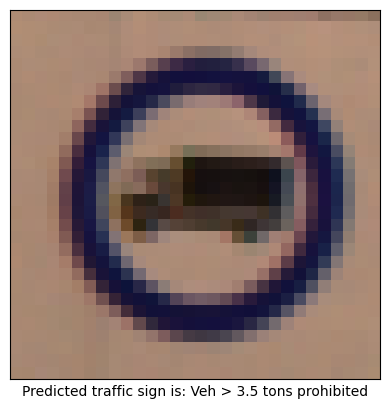

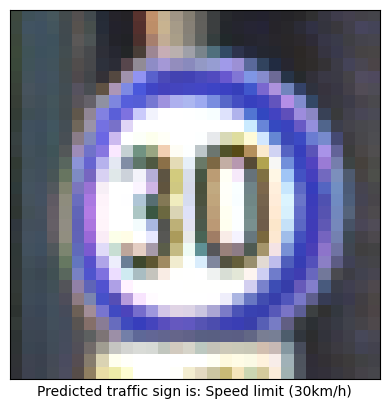

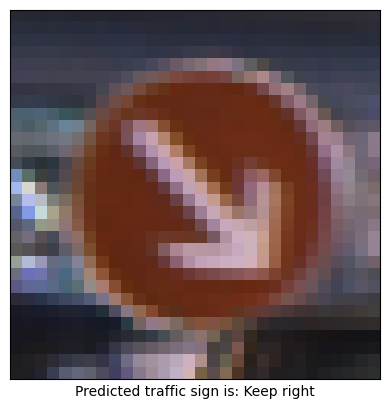

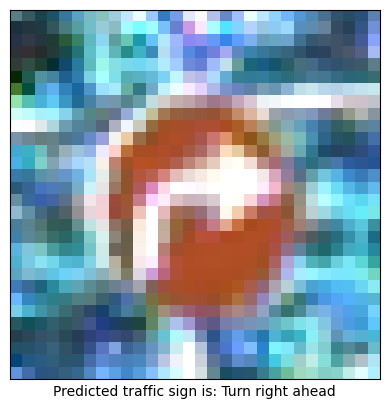

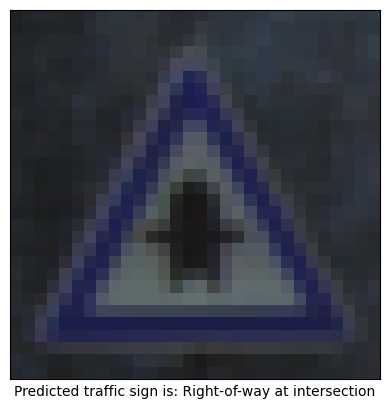

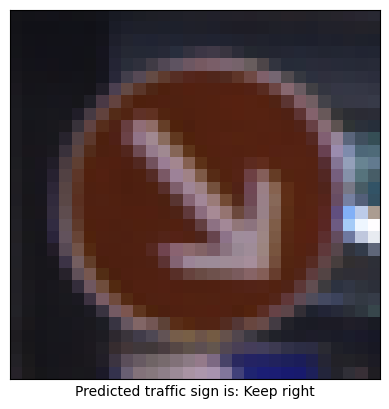

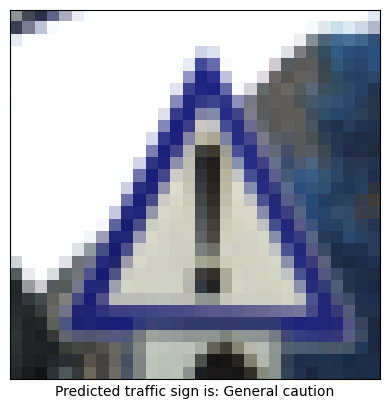

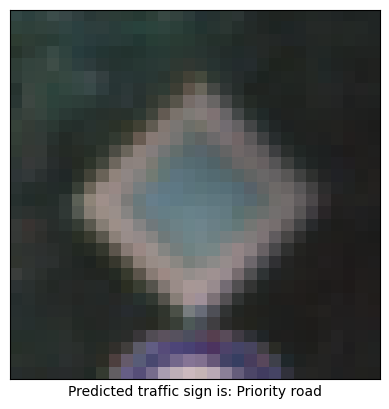

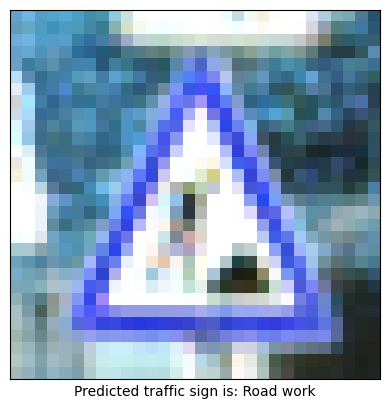

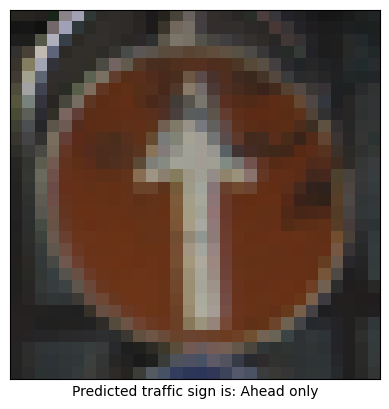

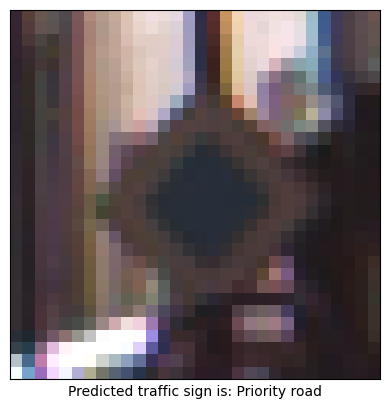

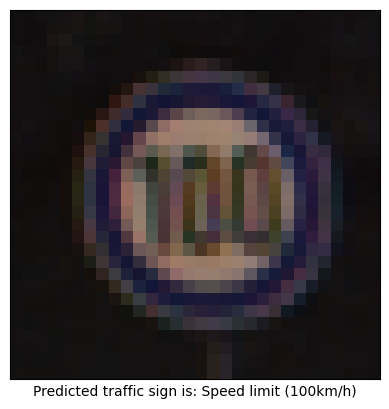

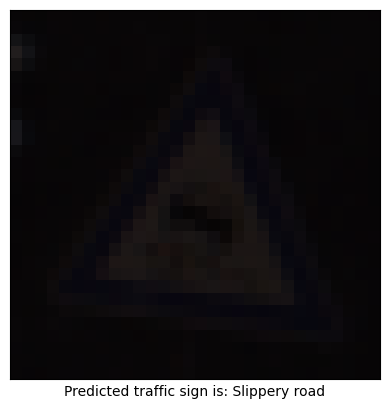

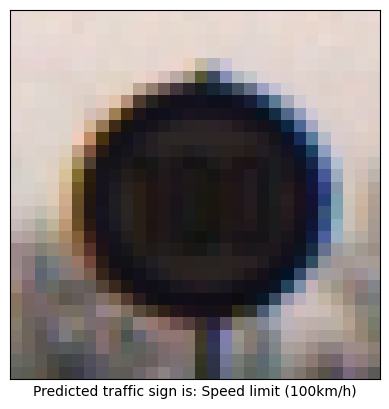

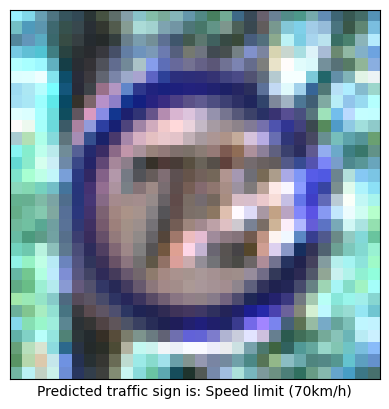

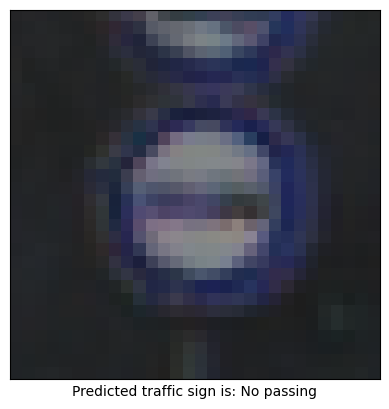

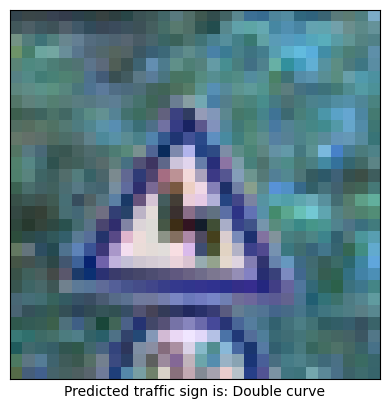

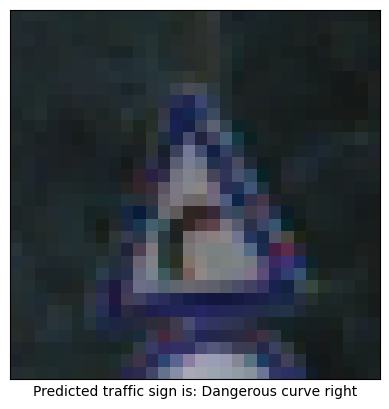

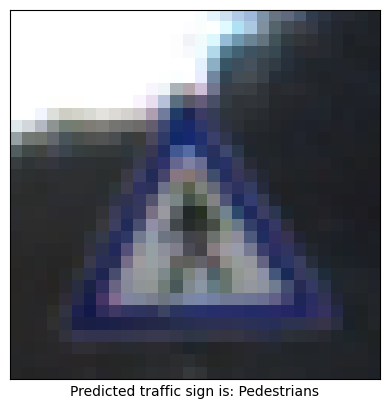

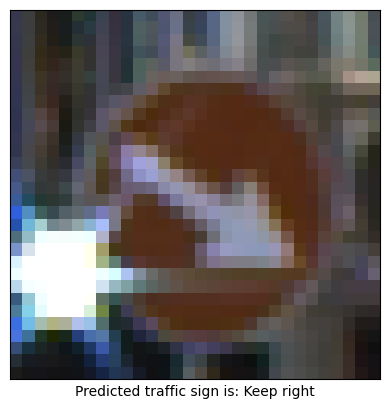

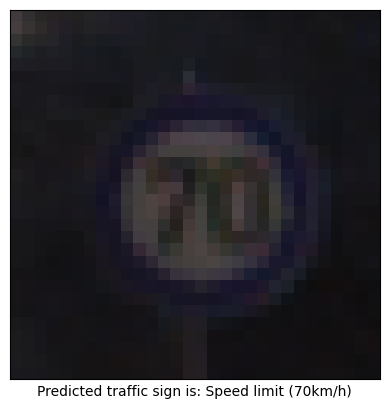

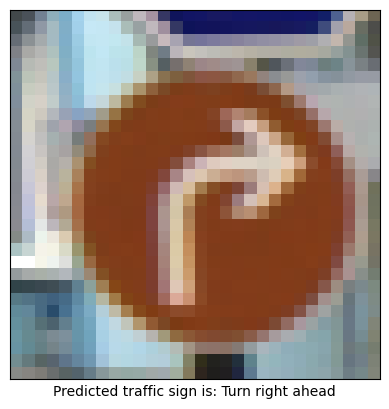

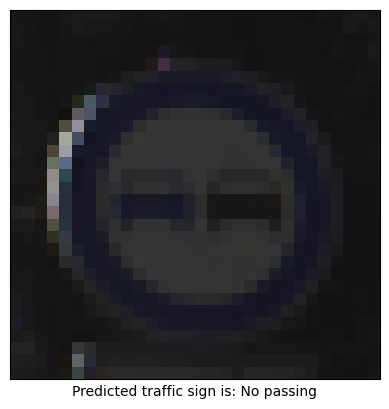

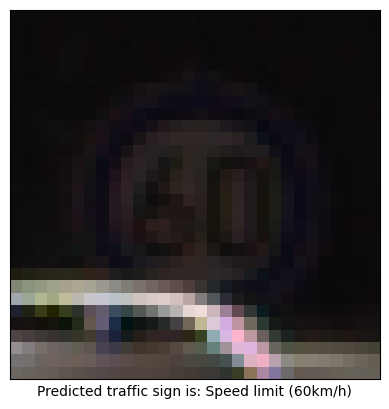

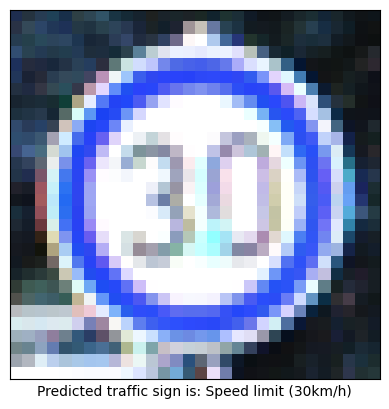

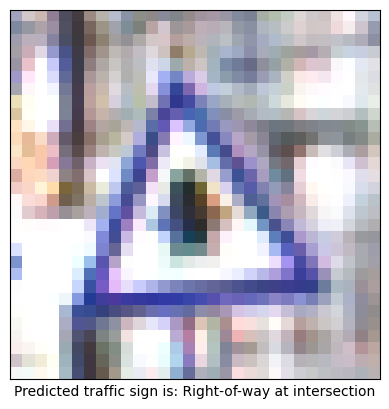

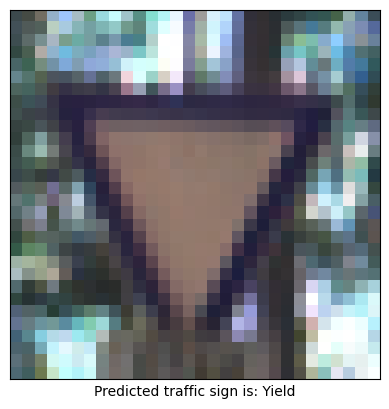

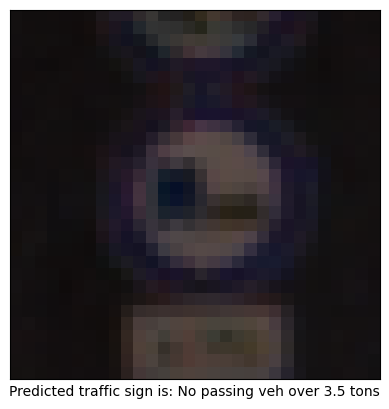

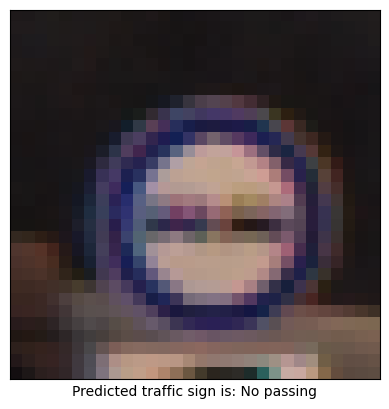

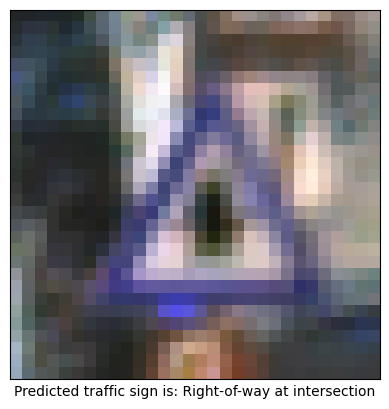

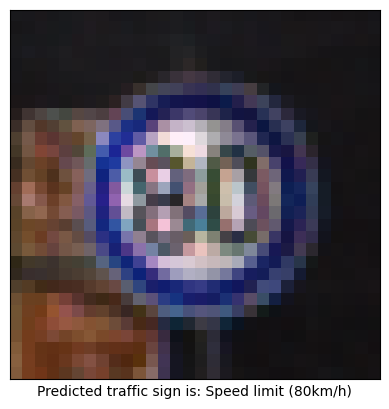

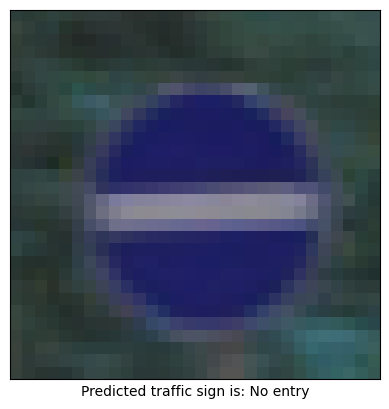

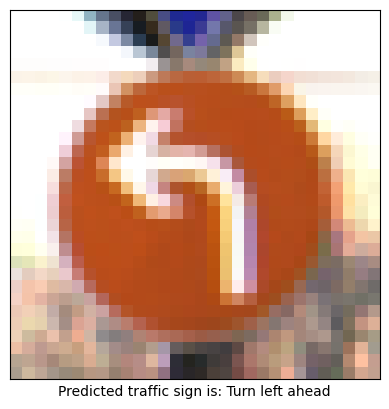

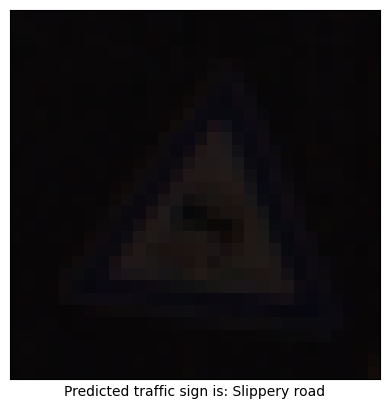

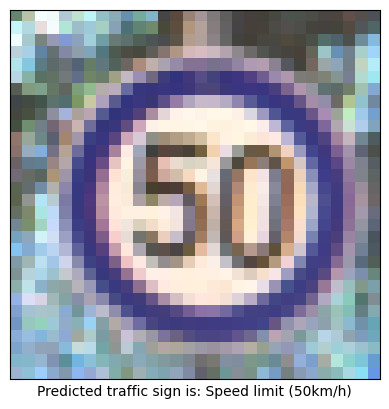

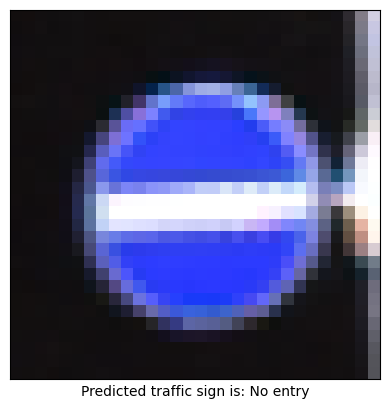

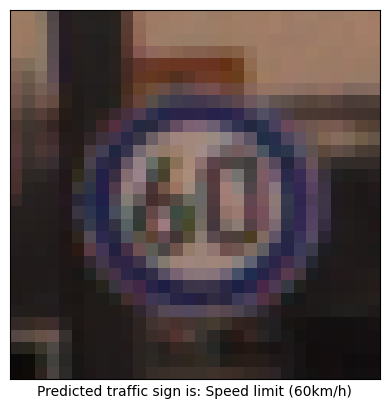

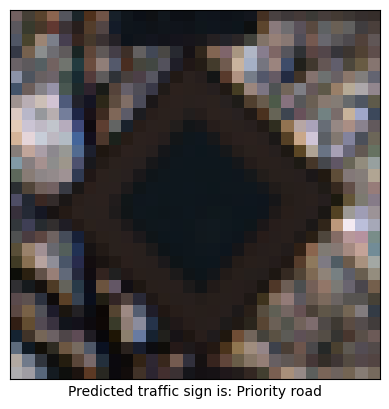

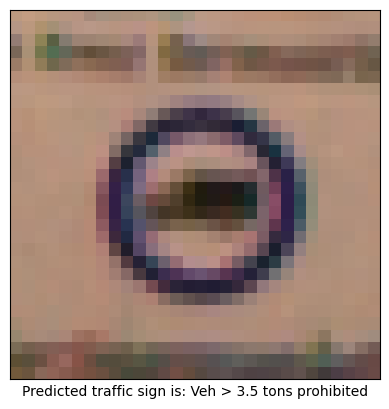

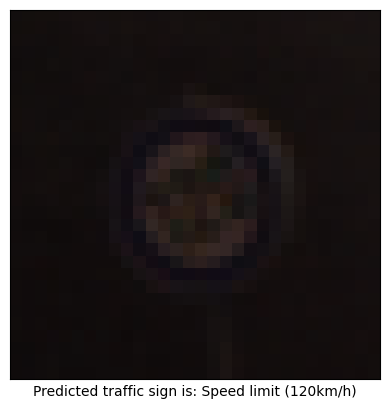

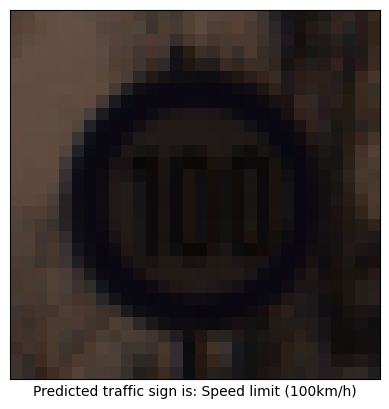

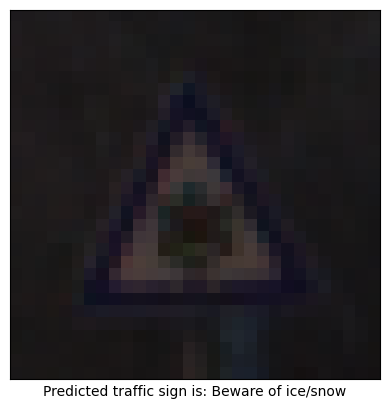

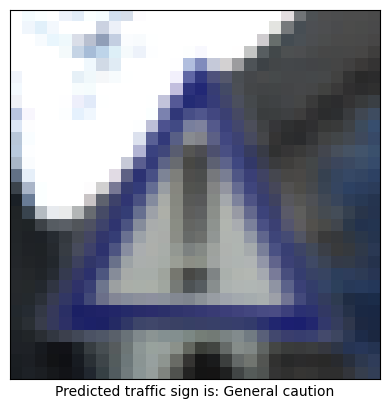

In [56]:
import sys
sys.set_int_max_str_digits(0)
plot=image_fromarray
for i in range(43):
    plt.grid(False)
    plt.xticks([]) # to remove markings on x axis
    plt.yticks([]) # to remove markings on x axis
    s = y_pred[start_index+i]
    plt.xlabel("Predicted traffic sign is: {}".format(classes[s]))
    plt.imshow(x_test[start_index+i])
    plt.show()

In [57]:
from sklearn.metrics import classification_report

print(classification_report(label, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.96      0.99      0.97       720
           2       1.00      1.00      1.00       750
           3       1.00      0.95      0.97       450
           4       0.99      0.99      0.99       660
           5       0.92      1.00      0.95       630
           6       0.99      0.89      0.94       150
           7       0.99      0.96      0.98       450
           8       0.97      0.97      0.97       450
           9       0.99      0.97      0.98       480
          10       0.98      0.99      0.99       660
          11       1.00      0.91      0.95       420
          12       0.99      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       0.99      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    